# Neural Network - Two layer - X hidden units on Planar dataset

After completed the first course of Deep Learning Specialization on Coursera taught by Andrew Ng, I am implementing the algorithms on my own to retain the material taught.

In this notebook, Iam implementing a two layers neural network algorithm which is used on Planes in Satellite Imagery dataset which can be found at https://www.kaggle.com/rhammell/planesnet/home

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from load_data import loadData
%matplotlib inline

images, labels = loadData()
print(images.shape)
print(labels.shape)

(32000, 20, 20, 3)
(1, 32000)


In [2]:
# Get the total of images in the dataset and split it
# in train and test. 90% of the data is used for train
# 10% for testing.

n_images = images.shape[0]
train_test_percentage = 0.9
m_train = int(train_test_percentage * n_images)
m_test = n_images - m_train

print("The total of images are: " + str(n_images))
print("The m_train = " + str(m_train) + " correspónd to 90% of the dataset.")
print("The m_test = " + str(m_test) + " correspónd to 10% of the dataset.")

The total of images are: 32000
The m_train = 28800 correspónd to 90% of the dataset.
The m_test = 3200 correspónd to 10% of the dataset.


In [3]:
# Randomly generate an permutation from 0 to m_train
random_indices = np.random.permutation(n_images)
train_indices = random_indices[0:m_train]
test_indices = random_indices[m_train:]

# Sanity check
assert len(train_indices) == m_train
assert len(test_indices) == m_test



One labeled images


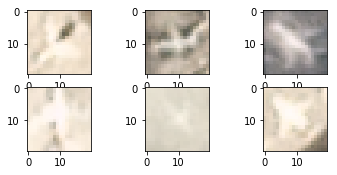

Zero labeled images


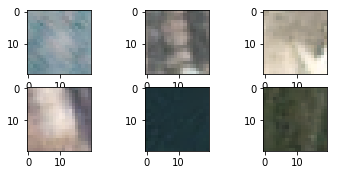

In [4]:
# Before preprocessing the data, lets visualize 12 images, 6 with zero label and 5 with 1 label
zero_label_images = images[(labels == 0)[0]][0:6]
one_label_images = images[(labels == 1)[0]][0:6]

print("One labeled images")
for i in range(0, 6):
    plt.subplot(330 + i+1)
    plt.imshow(one_label_images[i, : , :])

plt.show()
    
print("Zero labeled images")
for i in range(0, 6):
    plt.subplot(330 + i+1)
    plt.imshow(zero_label_images[i, : , :])
    
plt.show()



In [5]:
# Standardize the data
images = images / 255

# Split images train and test and their corresponded shapes
images_train = images[train_indices, :, :]
labels_train = np.array([labels[0][train_indices]])
images_test = images[test_indices, :, :]
labels_test = np.array([labels[0][test_indices]])

print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

# Flatten the images

images_train = np.reshape(images_train, (images_train.shape[0], -1)).T
images_test = np.reshape(images_test, (images_test.shape[0], -1)).T
print(images_train.shape)
print(images_test.shape)

(28800, 20, 20, 3)
(1, 28800)
(3200, 20, 20, 3)
(1, 3200)
(1200, 28800)
(1200, 3200)


In [6]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    return 1/(1 + np.exp(-z))

In [7]:
def tanh(z):
    """
    Compute the hyperbolic tangent of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- tanh(z)
    """
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

In [8]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [9]:
def initialize_weights_and_bias(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    
    """
    W1 = np.random.randn(n_h, n_x)*1/(np.sqrt(n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*1/(np.sqrt(n_x))
    b2 = np.zeros((n_y, 1))

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [10]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [11]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) 
    cost = - np.sum(logprobs + np.log(1-A2)*(1-Y))/m
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [12]:
def backward_propagation(parameters, cache, X, Y):
    """ 
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)* m**(-1)
    db2 = m**(-1) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) * m**(-1) 
    db1 = m**(-1) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [13]:
def update_parameters(parameters, grads, learning_rate = 0.125):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    

    parameters = initialize_weights_and_bias(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [15]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [16]:
# Build a model with a n_h-dimensional hidden layer
X = images_train
Y = labels_train
parameters = nn_model(X, Y, n_h = 20, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.696895
Cost after iteration 1000: 0.485029
Cost after iteration 2000: 0.377235
Cost after iteration 3000: 0.309625
Cost after iteration 4000: 0.285340
Cost after iteration 5000: 0.259621
Cost after iteration 6000: 0.245050
Cost after iteration 7000: 0.234518
Cost after iteration 8000: 0.225827
Cost after iteration 9000: 0.218194


In [17]:
# Print accuracy
X = images_test
Y = labels_test

predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%
